In [29]:
# stanford dog breed 데이터 세트 다운로드 
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
# 현재 디렉토리인 /kaggle/working에 바로 압축 해제 
!ls; tar -xvf images.tar

--2022-10-07 00:36:42--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar’

images.tar          100%[===================>] 756.82M  18.3MB/s    in 45s     

2022-10-07 00:37:28 (16.7 MB/s) - ‘images.tar’ saved [793579520/793579520]

__notebook_source__.ipynb  images.tar
Images/
Images/n02085620-Chihuahua/
Images/n02085620-Chihuahua/n02085620_10621.jpg
Images/n02085620-Chihuahua/n02085620_10976.jpg
Images/n02085620-Chihuahua/n02085620_11238.jpg
Images/n02085620-Chihuahua/n02085620_11258.jpg
Images/n02085620-Chihuahua/n02085620_11337.jpg
Images/n02085620-Chihuahua/n02085620_1152.jpg
Images/n02085620-Chihuahua/n02085620_11696.jpg
Images/n02085620-Chihuahua/n02085620_11818.jpg
Images/n02085620-Chihuahua/n02085620_

In [30]:
!ls; pwd

Images	__notebook_source__.ipynb  images.tar
/kaggle/working


In [31]:
!cd /kaggle/working/Images;ls

n02085620-Chihuahua			  n02100583-vizsla
n02085782-Japanese_spaniel		  n02100735-English_setter
n02085936-Maltese_dog			  n02100877-Irish_setter
n02086079-Pekinese			  n02101006-Gordon_setter
n02086240-Shih-Tzu			  n02101388-Brittany_spaniel
n02086646-Blenheim_spaniel		  n02101556-clumber
n02086910-papillon			  n02102040-English_springer
n02087046-toy_terrier			  n02102177-Welsh_springer_spaniel
n02087394-Rhodesian_ridgeback		  n02102318-cocker_spaniel
n02088094-Afghan_hound			  n02102480-Sussex_spaniel
n02088238-basset			  n02102973-Irish_water_spaniel
n02088364-beagle			  n02104029-kuvasz
n02088466-bloodhound			  n02104365-schipperke
n02088632-bluetick			  n02105056-groenendael
n02089078-black-and-tan_coonhound	  n02105162-malinois
n02089867-Walker_hound			  n02105251-briard
n02089973-English_foxhound		  n02105412-kelpie
n02090379-redbone			  n02105505-komondor
n02090622-borzoi			  n02105641-Old_English_sheepdog
n02090721-Irish_wolfhound		  n02105855-Shetland_sheepdog
n02091032-Itali

In [32]:
import numpy as np
import pandas as pd
import os

# IMAGE_DIR = '/Users/f2hard3/Workspace/deep-learning-cnn/develop/Images'
IMAGE_DIR = '/kaggle/working/Images'

for dirname, _, filenames in os.walk(IMAGE_DIR):
  for filename in filenames:
    print(os.path.join(dirname, filename))

/kaggle/working/Images/n02105251-briard/n02105251_8643.jpg
/kaggle/working/Images/n02105251-briard/n02105251_7977.jpg
/kaggle/working/Images/n02105251-briard/n02105251_7223.jpg
/kaggle/working/Images/n02105251-briard/n02105251_4027.jpg
/kaggle/working/Images/n02105251-briard/n02105251_7593.jpg
/kaggle/working/Images/n02105251-briard/n02105251_4659.jpg
/kaggle/working/Images/n02105251-briard/n02105251_7058.jpg
/kaggle/working/Images/n02105251-briard/n02105251_7115.jpg
/kaggle/working/Images/n02105251-briard/n02105251_6867.jpg
/kaggle/working/Images/n02105251-briard/n02105251_8078.jpg
/kaggle/working/Images/n02105251-briard/n02105251_8854.jpg
/kaggle/working/Images/n02105251-briard/n02105251_3746.jpg
/kaggle/working/Images/n02105251-briard/n02105251_1240.jpg
/kaggle/working/Images/n02105251-briard/n02105251_7178.jpg
/kaggle/working/Images/n02105251-briard/n02105251_4996.jpg
/kaggle/working/Images/n02105251-briard/n02105251_673.jpg
/kaggle/working/Images/n02105251-briard/n02105251_7816.jp

In [33]:
from pathlib import Path

def make_dogbreed_dataframe(image_dir=IMAGE_DIR):
  paths= []
  label_gubun = []

  for dirname, _, filenames in os.walk(image_dir):
    for filename in filenames:
      if '.jpg' in filename:
        file_path = os.path.join(dirname, filename)
        paths.append(file_path)

        temp_breed = Path(file_path).parent.name
        breed = temp_breed.split('-', 1)[1]
        label_gubun.append(breed)
  
  data_df = pd.DataFrame({'path': paths, 'label': label_gubun})
  
  return data_df

In [34]:
temp = Path('/kaggle/working/Images/n02089078-black-and-tan_coonhound/n02089078_2110.jpg').parent.name
# temp.partition('-')[2]
temp.split('-', 1)[1]

'black-and-tan_coonhound'

In [35]:
pd.set_option('display.max_colwidth', 200)
data_df = make_dogbreed_dataframe()
print('data_df.shape:', data_df.shape)
data_df.head()

data_df.shape: (20580, 2)


path   label
0  /kaggle/working/Images/n02105251-briard/n02105251_8643.jpg  briard
1  /kaggle/working/Images/n02105251-briard/n02105251_7977.jpg  briard
2  /kaggle/working/Images/n02105251-briard/n02105251_7223.jpg  briard
3  /kaggle/working/Images/n02105251-briard/n02105251_4027.jpg  briard
4  /kaggle/working/Images/n02105251-briard/n02105251_7593.jpg  briard

In [36]:
data_df['label'].value_counts()

Maltese_dog               252
Afghan_hound              239
Scottish_deerhound        232
Pomeranian                219
Samoyed                   218
                         ... 
Welsh_springer_spaniel    150
Bouvier_des_Flandres      150
kuvasz                    150
Pekinese                  149
redbone                   148
Name: label, Length: 120, dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119]),
 [Text(0, 0, 'briard'),
  Text(1, 0, 'Scotch_terrier'),
  Text(2, 0, 'whippet'),
  Text(3, 0, 'Appenzeller'),
  Text(4, 0, 'EntleBucher'),
  Text(5, 0, 'Border_terrier'),
  Text(6, 0, 'Bernese_mountain_dog'),
  Text(7, 0, 'miniature_pinscher'),
  Text(8, 0, 'Irish_terrier'),
  Text(9, 0, 'Saint_Bernard'),
  Text(10, 

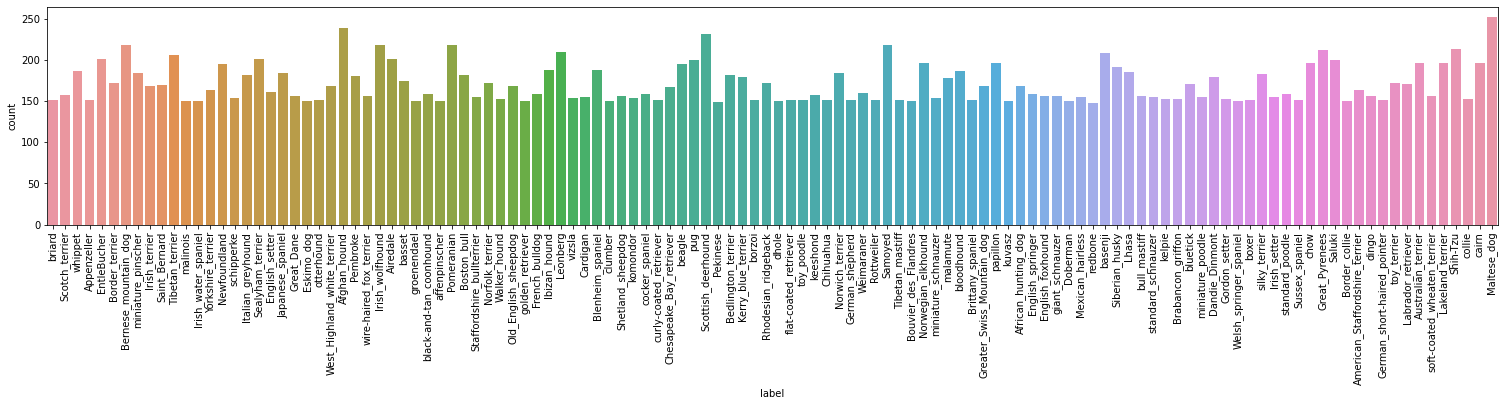

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(26, 4))
sns.countplot(data=data_df, x='label')
plt.xticks(rotation=90)

In [38]:
import cv2

def show_grid_images(image_path_list, ncols=8, title=None):
  figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
  for i in range(ncols):
    image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
    axs[i].imshow(image)
    axs[i].set_title(title)

In [39]:
breed_image_list_01 = data_df[data_df['label'] == 'Staffordshire_bullterrier']['path'].iloc[:6].to_list()
breed_image_list_02 = data_df[data_df['label'] == 'American_Staffordshire_terrier']['path'].iloc[:6].to_list()

show_grid_images(breed_image_list_01, ncols=6, title='Staffordshire_bullterrier')
show_grid_images(breed_image_list_02, ncols=6, title='American_Staffordshire_terrier')

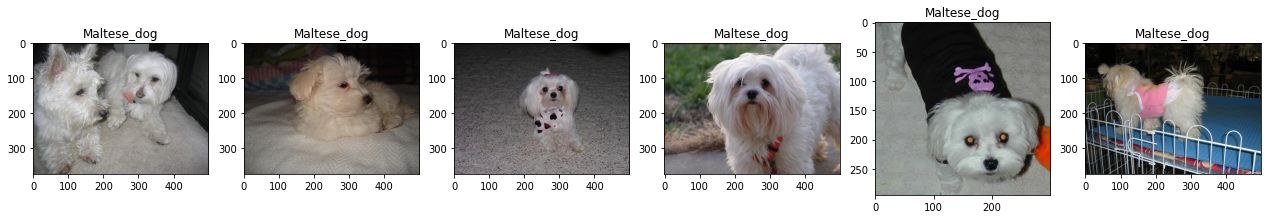

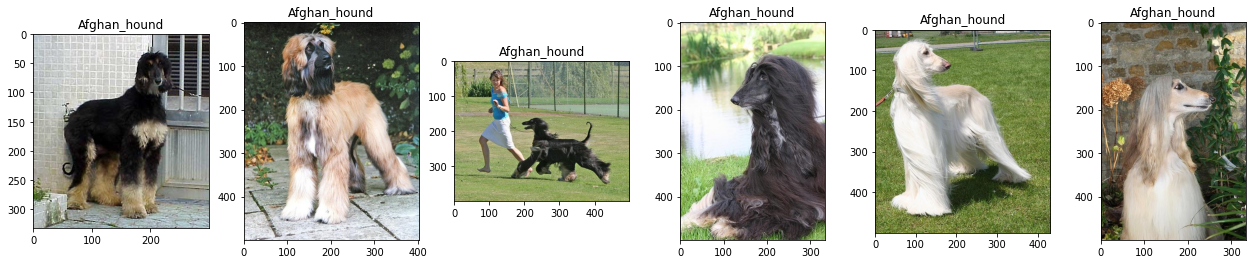

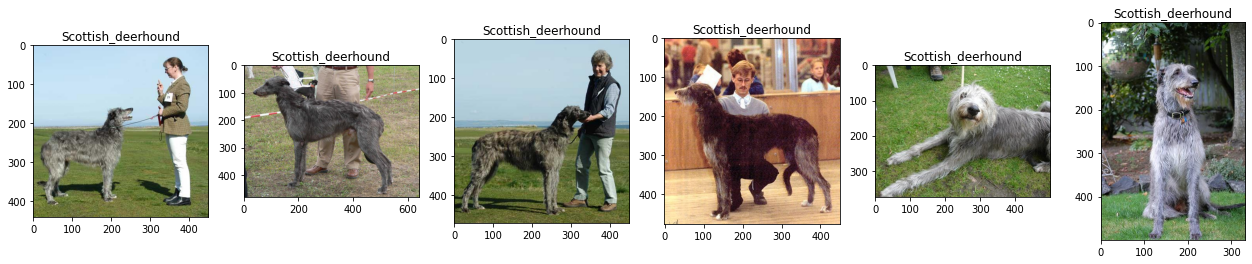

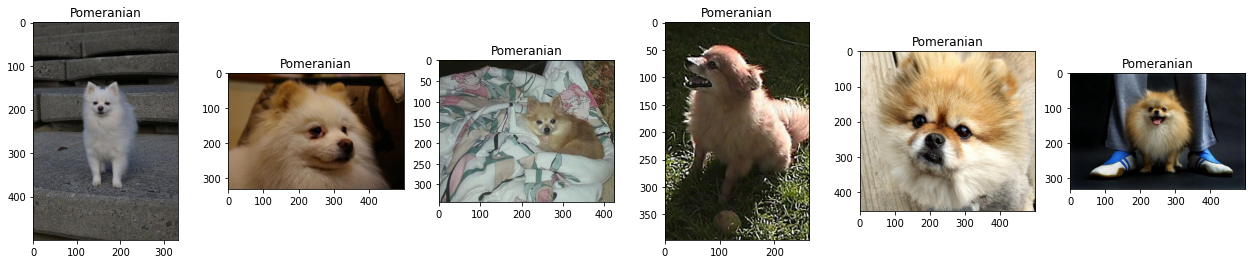

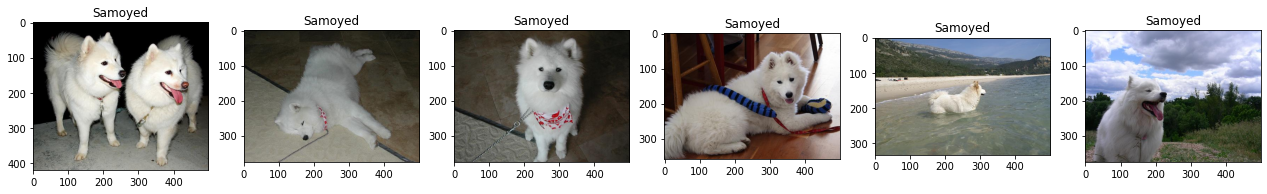

In [40]:
breed_list = data_df['label'].value_counts().index.tolist()

for iter_cnt, breed in enumerate(breed_list):
  breed_image_list = data_df[data_df['label'] == breed]['path'].iloc[:6].tolist()
  show_grid_images(breed_image_list, ncols=6, title=breed)
  if iter_cnt == 4:
    break

In [41]:
import albumentations as A

temp_augmentor = A.Compose([
  A.HorizontalFlip(p=0.5),
  A.VerticalFlip(p=0.5),
  A.ShiftScaleRotate(p=0.5),
  A.CenterCrop(height=200, width=200, p=0.5),
  A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.5),
  A.HueSaturationValue(hue_shift_limit=0.2, sat_shift_limit=0.2, val_shift_limit=0.2, p=0.5)
])

def show_grid_images(image_path_list, augmentor= None, ncols=4, title=None):
  figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
  for i in range(ncols):
    image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    
    if augmentor is not None:
      image = augmentor(image=image)['image']
    
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(title)

In [42]:
breed_image_list_01 = data_df[data_df['label'] == 'Staffordshire_bullterrier']['path'].iloc[:6].tolist()
show_grid_images(breed_image_list_01, augmentor=None, ncols=6, title='original Staffordshire_bullterrier')
show_grid_images(breed_image_list_01, augmentor=temp_augmentor, ncols=6, title='augmented Staffordshire_bullterrier')

In [43]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data_df, test_size=0.4, stratify=data_df['label'], random_state=2022)

train_df.shape, test_df.shape

((12348, 2), (8232, 2))

In [44]:
train_df['label'].value_counts() / len(train_df), test_df['label'].value_counts() / len(test_df)

(Maltese_dog            0.012229
 Afghan_hound           0.011662
 Scottish_deerhound     0.011257
 Pomeranian             0.010690
 Samoyed                0.010609
                          ...   
 Irish_water_spaniel    0.007289
 kuvasz                 0.007289
 malinois               0.007289
 Pekinese               0.007208
 redbone                0.007208
 Name: label, Length: 120, dtype: float64,
 Maltese_dog             0.012269
 Afghan_hound            0.011540
 Scottish_deerhound      0.011297
 Samoyed                 0.010569
 Pomeranian              0.010569
                           ...   
 golden_retriever        0.007289
 kuvasz                  0.007289
 Bouvier_des_Flandres    0.007289
 dhole                   0.007289
 redbone                 0.007167
 Name: label, Length: 120, dtype: float64)

In [45]:
from sklearn.model_selection import train_test_split

def get_train_valid(train_df, valid_size=0.2, random_state=2021):
    train_path = train_df['path'].values
    train_label = pd.get_dummies(train_df['label']).values
    
    tr_path, val_path, tr_label, val_label = train_test_split(train_path, train_label, test_size=valid_size, random_state=random_state)
    print('tr_path shape:', tr_path.shape, 'tr_label shape:', tr_label.shape, 'val_path shape:', val_path.shape, 'val_label shape:', val_label.shape)
    
    return tr_path, val_path, tr_label, val_label

In [46]:
from tensorflow.keras.utils import Sequence
import sklearn
import cv2

BATCH_SIZE = 64
IMAGE_SIZE = 224

class Breed_Dataset(Sequence):
    def __init__(self, image_filenames, labels, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, augmentor=None, shuffle=False, pre_func=None):
      self.image_filenames = image_filenames
      self.labels = labels
      self.image_size = image_size
      self.batch_size = batch_size
      self.augmentor = augmentor
      self.shuffle = shuffle
      self.pre_func = pre_func

      if self.shuffle:
        # self.on_epoch_end()
        pass

    def __len__(self):
      return int(np.ceil(len(self.labels) / self.batch_size))
    
    def __getitem__(self, index):
      image_name_batch = self.image_filenames[index*self.batch_size:(index+1)*self.batch_size]
      if self.labels is not None:
        label_batch = self.labels[index*self.batch_size:(index+1)*self.batch_size]

      image_batch = np.zeros((len(image_name_batch), self.image_size, self.image_size, 3), dtype='float32')

      for image_index in range(len(image_name_batch)):
        image = cv2.cvtColor(cv2.imread(image_name_batch[image_index]), cv2.COLOR_BGR2RGB)
        if self.augmentor is not None:
          image = self.augmentor(image=image)['image']
        image = cv2.resize(image, (self.image_size, self.image_size))
        if self.pre_func is not None:
          image = self.pre_func(image)

        image_batch[image_index] = image

      return image_batch, label_batch

    def __on_epoch_end(self):
      if self.shuffle:
        self.image_filenames, self.labels = sklearn.utils.shuffle(self.image_filenames, self.labels)
      else:
        pass


In [47]:
import albumentations as A

augmentor_light = A.Compose([
  A.HorizontalFlip(p=0.5)
])

In [49]:
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications.xception import preprocess_input as xcp_preprocess_input

tr_path, val_path, tr_label, val_label = get_train_valid(train_df, valid_size=0.2, random_state=2021)

tr_ds = Breed_Dataset(tr_path, tr_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, augmentor=augmentor_light, shuffle=True, pre_func=xcp_preprocess_input)
val_ds = Breed_Dataset(val_path, val_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, augmentor=None, shuffle=False, pre_func=xcp_preprocess_input)

tr_path shape: (9878,) tr_label shape: (9878, 120) val_path shape: (2470,) val_label shape: (2470, 120)


In [50]:
tr_image_batch = next(iter(tr_ds))[0]
val_image_batch = next(iter(val_ds))[0]

tr_image_batch.shape, val_image_batch.shape, tr_image_batch[:1], val_image_batch[:1]

((64, 224, 224, 3),
 (64, 224, 224, 3),
 array([[[[ 0.30980396,  0.082353  , -0.04313725],
          [ 0.27843142,  0.09803927, -0.03529412],
          [ 0.22352946,  0.21568632,  0.03529418],
          ...,
          [ 0.27843142,  0.26274514,  0.06666672],
          [-0.12941176, -0.1372549 , -0.35686272],
          [-0.1372549 , -0.14509803, -0.36470586]],
 
         [[ 0.09019613, -0.12156862, -0.20784312],
          [ 0.15294123, -0.02745098, -0.12156862],
          [ 0.082353  ,  0.02745104, -0.12156862],
          ...,
          [ 0.13725495,  0.16078436, -0.06666666],
          [-0.02745098, -0.00392157, -0.24705881],
          [-0.17647058, -0.16862744, -0.41176468]],
 
         [[ 0.6313726 ,  0.47450984,  0.41960788],
          [ 0.48235297,  0.33333337,  0.27058828],
          [ 0.09803927, -0.01960784, -0.14509803],
          ...,
          [-0.34117645, -0.29411763, -0.54509807],
          [ 0.23921573,  0.28627455,  0.02745104],
          [-0.1607843 , -0.12941176, -0.38

In [51]:
import time

start = time.time()
for value1, value2 in iter(tr_ds):
  end = time.time()
  print(end-start)
  start = end

0.5019502639770508
0.9026331901550293
0.6467344760894775
0.5163986682891846
0.291701078414917
0.3098154067993164
0.31265735626220703
0.32188868522644043
0.366624116897583
0.31044650077819824
0.2992215156555176
0.2815284729003906
0.3087010383605957
0.2822566032409668
0.4772670269012451
0.5275440216064453
0.31408143043518066
0.3119850158691406
0.3072342872619629
0.29875731468200684
0.30294179916381836
0.2933042049407959
0.3410484790802002
0.2985203266143799
0.3211493492126465
0.297393798828125
0.3199498653411865
0.36337852478027344
0.27875494956970215
0.30205845832824707
0.35419464111328125
0.2954273223876953
0.36151576042175293
0.3089275360107422
0.3016536235809326
0.3007228374481201
0.298079252243042
0.316896915435791
0.32494664192199707
0.30867767333984375
0.3216397762298584
0.31975865364074707
0.2796897888183594
0.28060460090637207
0.35231733322143555
0.30518651008605957
0.36498165130615234
0.2908658981323242
0.5087244510650635
0.47023487091064453
0.2951233386993408
0.274007558822631

In [52]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.applications import Xception, ResNet50V2, EfficientNetB0, EfficientNetB1
from tensorflow.keras.applications import MobileNet
import tensorflow as tf

def create_model(model_type='xception', in_shape=(224, 224, 3), n_classes=120):
  input_tensor = Input(shape=in_shape)
  if model_type == 'resnet50v2':
    base_model = ResNet50V2(include_top=False, weights='imagenet', input_tensor=input_tensor)
  elif model_type == 'xception':
    base_model = Xception(include_top=False, weights='imagenet', input_tensor=input_tensor)
  elif model_type == 'efficientnetb0':
    base_model = EfficientNetB0(include_top=False, weights='imagenet', input_tensor=input_tensor)
  elif model_type == 'efficientnetb1':
    base_model = EfficientNetB1(include_top=False, weights='imagenet', input_tensor=input_tensor)

  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  x = Dense(1024, activation='relu')(x)
  x = Dropout(0.5)(x)
  preds = Dense(units=n_classes, activation='softmax')(x)
  model = Model(inputs=input_tensor, outputs=preds)

  return model

In [53]:
N_EPOCHS = 30

def train_model(model_type, train_df, initial_lr=0.0001, augmentor=None, input_pre_func=None):
  tr_path, val_path, tr_label, val_label = get_train_valid(train_df, valid_size=0.2, random_state=2021)
  
  tr_ds = Breed_Dataset(tr_path, tr_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, augmentor=augmentor, shuffle=True, pre_func=input_pre_func)
  val_ds = Breed_Dataset(val_path, val_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, augmentor=augmentor, shuffle=False, pre_func=input_pre_func)

  print(f'#######{model_type}#######')
  model = create_model(model_type=model_type)
  model.compile(optimizer=Adam(lr=initial_lr), loss='categorical_crossentropy', metrics=['accuracy'])

  rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, mode='min', verbose=1)
  ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

  history = model.fit(tr_ds, epochs=N_EPOCHS, validation_data=val_ds, callbacks=[rlr_cb, ely_cb], verbose=1)

  return model, history

In [54]:
data_df = make_dogbreed_dataframe(image_dir=IMAGE_DIR)
train_df, test_df = train_test_split(data_df, test_size=0.4, stratify=data_df['label'], random_state=2021)
print(train_df.shape, test_df.shape)

(12348, 2) (8232, 2)


In [55]:
from tensorflow.keras.applications.xception import preprocess_input as xcp_preprocess_input

xception_model, xception_history = train_model(model_type='xception', train_df=train_df, initial_lr=0.0001, augmentor=augmentor_light, input_pre_func=xcp_preprocess_input)

test_path = test_df['path'].values
test_label = pd.get_dummies(test_df['label']).values

test_ds = Breed_Dataset(test_path, test_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, augmentor=None, shuffle=False, pre_func=xcp_preprocess_input)
xception_model.evaluate(test_ds)

tr_path shape: (9878,) tr_label shape: (9878, 120) val_path shape: (2470,) val_label shape: (2470, 120)
#######xception#######


2022-10-07 00:41:15.116814: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 00:41:15.241510: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 00:41:15.245721: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 00:41:15.251523: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

83697664/83683744 [==============================] - 2s 0us/step


/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
2022-10-07 00:41:22.902661: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-10-07 00:41:31.008104: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


155/155 [==============================] - 157s 912ms/step - loss: 2.7786 - accuracy: 0.4376 - val_loss: 0.8304 - val_accuracy: 0.7522
Epoch 2/30
155/155 [==============================] - 137s 883ms/step - loss: 0.7929 - accuracy: 0.7897 - val_loss: 0.7121 - val_accuracy: 0.7972
Epoch 3/30
155/155 [==============================] - 140s 901ms/step - loss: 0.3838 - accuracy: 0.8930 - val_loss: 0.6870 - val_accuracy: 0.7943
Epoch 4/30
155/155 [==============================] - 137s 880ms/step - loss: 0.2165 - accuracy: 0.9416 - val_loss: 0.6226 - val_accuracy: 0.8101
Epoch 5/30
155/155 [==============================] - 143s 918ms/step - loss: 0.1161 - accuracy: 0.9707 - val_loss: 0.6294 - val_accuracy: 0.8089
Epoch 6/30
155/155 [==============================] - 135s 870ms/step - loss: 0.0687 - accuracy: 0.9847 - val_loss: 0.6552 - val_accuracy: 0.8065
Epoch 7/30
155/155 [==============================] - 135s 869ms/step - loss: 0.0489 - accuracy: 0.9903 - val_loss: 0.7040 - val_accura

[0.6813439726829529, 0.8134110569953918]

In [56]:
test_df['gt_class'] = np.argmax(test_label, axis=1)

In [57]:
test_ds = Breed_Dataset(test_path, test_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, augmentor=None, shuffle=False, pre_func=xcp_preprocess_input)
xception_model.evaluate(test_ds)

129/129 [==============================] - 56s 433ms/step - loss: 0.6813 - accuracy: 0.8134


[0.6813439726829529, 0.8134110569953918]

In [58]:
predicted_result = xception_model.predict(test_ds, steps=int(np.ceil(len(test_label)/BATCH_SIZE)))
predicted_class = np.argmax(predicted_result, axis=1)
test_df['xcp_pred_class'] = predicted_class

In [59]:
test_df.head()

path  \
18815  /kaggle/working/Images/n02100236-German_short-haired_pointer/n02100236_5538.jpg   
16986                         /kaggle/working/Images/n02108089-boxer/n02108089_813.jpg   
3812                    /kaggle/working/Images/n02109961-Eskimo_dog/n02109961_6221.jpg   
3754                    /kaggle/working/Images/n02109961-Eskimo_dog/n02109961_2832.jpg   
16443               /kaggle/working/Images/n02096437-Dandie_Dinmont/n02096437_1012.jpg   

                             label  gt_class  xcp_pred_class  
18815  German_short-haired_pointer        27              27  
16986                        boxer        82              82  
3812                    Eskimo_dog        24              24  
3754                    Eskimo_dog        24              24  
16443               Dandie_Dinmont        18              18

In [60]:
test_df[test_df['gt_class'] != test_df['xcp_pred_class']]

path  \
11801                      /kaggle/working/Images/n02106550-Rottweiler/n02106550_5222.jpg   
48                             /kaggle/working/Images/n02105251-briard/n02105251_7805.jpg   
3697                      /kaggle/working/Images/n02109961-Eskimo_dog/n02109961_11634.jpg   
18502  /kaggle/working/Images/n02093428-American_Staffordshire_terrier/n02093428_4514.jpg   
15545                    /kaggle/working/Images/n02108422-bull_mastiff/n02108422_3297.jpg   
...                                                                                   ...   
12098                 /kaggle/working/Images/n02108551-Tibetan_mastiff/n02108551_2611.jpg   
6356                  /kaggle/working/Images/n02094114-Norfolk_terrier/n02094114_2631.jpg   
6537                     /kaggle/working/Images/n02089867-Walker_hound/n02089867_3023.jpg   
5384                      /kaggle/working/Images/n02105056-groenendael/n02105056_3530.jpg   
18393                     /kaggle/working/Images/n02106166-Border_collie/n02106166_90.jpg   

                                label  gt_class  xcp_pred_class  
11801                      Rottweiler        55              65  
48                             briard        83             112  
3697                       Eskimo_dog        24              64  
18502  American_Staffordshire_terrier         3              65  
15545                    bull_mastiff        84              82  
...                               ...       ...             ...  
12098                 Tibetan_mastiff        67              46  
6356                  Norfolk_terrier        47              34  
6537                     Walker_hound        69              20  
5384                      groenendael        96              12  
18393                   Border_collie         9              93  

[1536 rows x 4 columns]

In [61]:
test_df[test_df['gt_class'] != test_df['xcp_pred_class']]['label'].value_counts()

Siberian_husky                    42
collie                            35
Eskimo_dog                        34
American_Staffordshire_terrier    34
miniature_poodle                  32
                                  ..
Blenheim_spaniel                   3
Afghan_hound                       3
Rottweiler                         3
pug                                2
Bedlington_terrier                 2
Name: label, Length: 119, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

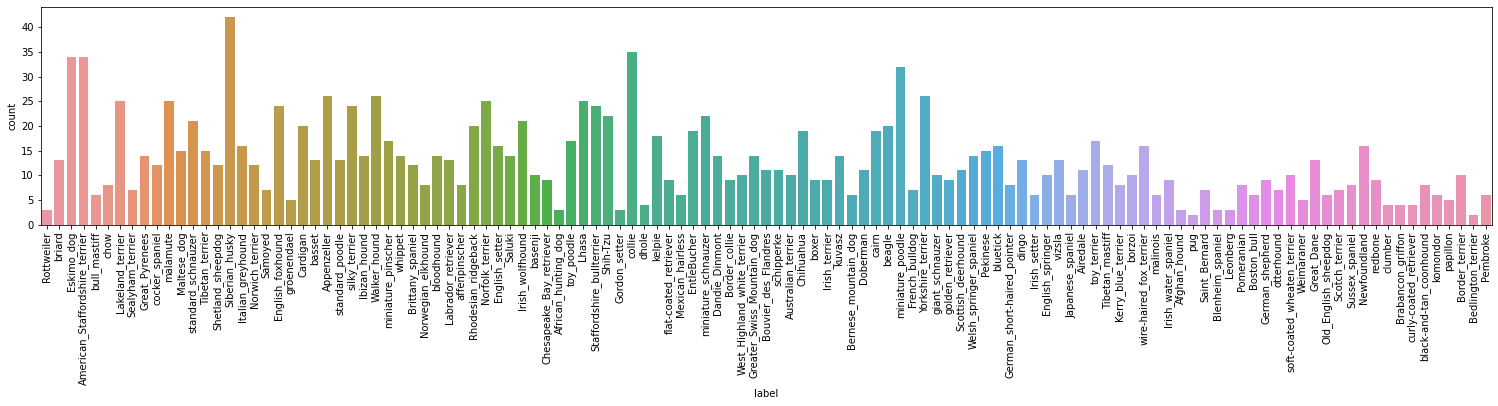

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(26, 4))
plt.xticks(rotation=90)

wrong_result_df = test_df[test_df['gt_class'] != test_df['xcp_pred_class']]
sns.countplot(data=wrong_result_df, x='label')

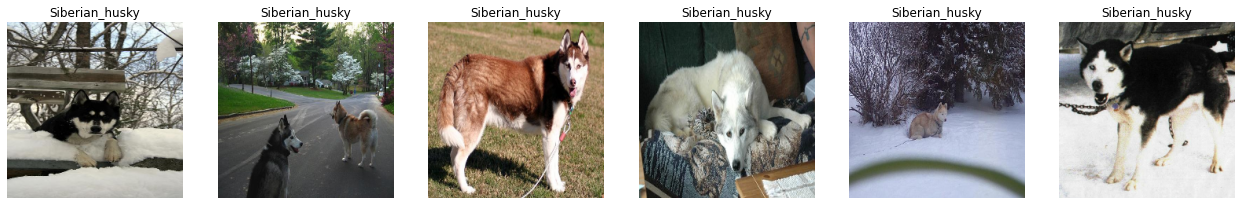

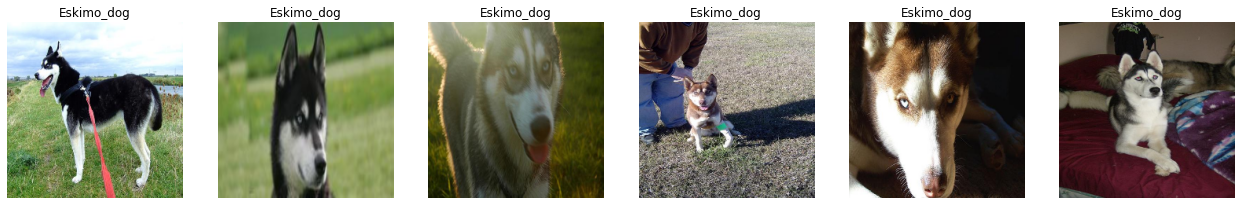

In [63]:
breed_image_list_01 = data_df[data_df['label']=='Siberian_husky']['path'].iloc[:6].tolist()
breed_image_list_02 = data_df[data_df['label']=='Eskimo_dog']['path'].iloc[:6].tolist()

show_grid_images(breed_image_list_01, ncols=6, title='Siberian_husky')
show_grid_images(breed_image_list_02, ncols=6, title='Eskimo_dog')

In [64]:
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess_input

effb0_model_t1, effb0_history_t1 = train_model(model_type='efficientnetb0', train_df=train_df, initial_lr=0.0001, augmentor=augmentor_light, input_pre_func=eff_preprocess_input)

tr_path shape: (9878,) tr_label shape: (9878, 120) val_path shape: (2470,) val_label shape: (2470, 120)
#######efficientnetb0#######
16719872/16705208 [==============================] - 0s 0us/step


/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
155/155 [==============================] - 115s 668ms/step - loss: 4.1032 - accuracy: 0.1543 - val_loss: 2.2093 - val_accuracy: 0.5036
Epoch 2/30
155/155 [==============================] - 111s 718ms/step - loss: 1.9034 - accuracy: 0.5237 - val_loss: 1.1083 - val_accuracy: 0.7328
Epoch 3/30
155/155 [==============================] - 107s 691ms/step - loss: 1.0996 - accuracy: 0.6873 - val_loss: 0.8298 - val_accuracy: 0.7733
Epoch 4/30
155/155 [==============================] - 99s 634ms/step - loss: 0.7979 - accuracy: 0.7658 - val_loss: 0.7141 - val_accuracy: 0.7858
Epoch 5/30
155/155 [==============================] - 99s 633ms/step - loss: 0.5985 - accuracy: 0.8190 - val_loss: 0.6616 - val_accuracy: 0.7980
Epoch 6/30
155/155 [==============================] - 99s 638ms/step - loss: 0.4518 - accuracy: 0.8690 - val_loss: 0.6513 - val_accuracy: 0.7915
Epoch 7/30
155/155 [==============================] - 100s 643ms/step - loss: 0.3544 - accuracy: 0.8957 - val_loss: 0.6138 - va

In [65]:
test_path = test_df['path'].values
test_label = pd.get_dummies(test_df['label']).values

test_ds = Breed_Dataset(test_path, test_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, augmentor=None, shuffle=False, pre_func=xcp_preprocess_input)
effb0_model_t1.evaluate(test_ds)

129/129 [==============================] - 52s 399ms/step - loss: 4.7911 - accuracy: 0.0097


[4.791129112243652, 0.009718173183500767]

In [ ]:
predict_result = effb0_model_t1.predict(test_ds, steps=int(np.ceil(test_label)/BATCH_SIZE))
predict_class = np.argmax(predict_result, axis=1)
test_df['effb0_t1_pred_class'] = predict_class

In [ ]:
test_df[test_df['gt_class'] != test_df['effb0_t1_pred_class']]['label'].value_counts()